In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!nvidia-smi

Tue Mar  5 12:28:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              23W / 300W |      2MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install scikit-ntk

In [ ]:
import tensorflow as tfa
import keras
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,Activation,BatchNormalization
from keras.models import Sequential
from skntk import NeuralTangentKernel as NTK
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.signal as tf
print("all the libraries are imported")

all the libraries are imported


In [ ]:
dataset_dir=r'/content/drive/MyDrive/the dataset/possible dataset/data'
image_height=512
image_width=512
batch_size=32
seed=42
validation_split=0.1

In [ ]:
train=keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    batch_size=batch_size,
    label_mode='int',
    image_size=(image_height,image_width),
    seed=seed,
    validation_split=validation_split,
    subset='training'
)
test=keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    label_mode='int',
    batch_size=batch_size,
    image_size=(image_height,image_width),
    seed=seed,
    validation_split=validation_split,
    subset='validation'
)

Found 1564 files belonging to 2 classes.
Using 1408 files for training.
Found 1564 files belonging to 2 classes.
Using 156 files for validation.


In [ ]:
input_shape=(image_height,image_width,3)

In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
resize_rescale=keras.Sequential([
    keras.layers.Resizing(image_height,image_width),
    keras.layers.Rescaling(1./255)
])

In [ ]:
data_augmentation=keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
])

In [ ]:
with tf.device('/device:GPU:0'):
  def fourier(inp=None):
    if inp==None:
        pass
    elif(inp!=None):
        return tf.fft3d(inp)
  #agorithmn 1
  model=Sequential([
    resize_rescale,
    data_augmentation,
    Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    MaxPool2D((3,3)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D((3,3)),

    Flatten(),

    Dense(32,activation=fourier()),
    Dense(1,activation='sigmoid'),
  ])
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(train,epochs=200,batch_size=32)


Epoch 1/200
44/44 [==============================] - 140s 2s/step - loss: 0.9144 - accuracy: 0.6719
Epoch 2/200
44/44 [==============================] - 11s 221ms/step - loss: 0.5078 - accuracy: 0.7692
Epoch 3/200
44/44 [==============================] - 11s 209ms/step - loss: 0.4556 - accuracy: 0.8061
Epoch 4/200
44/44 [==============================] - 11s 210ms/step - loss: 0.4402 - accuracy: 0.8210
Epoch 5/200
44/44 [==============================] - 11s 220ms/step - loss: 0.4275 - accuracy: 0.8203
Epoch 6/200
44/44 [==============================] - 10s 202ms/step - loss: 0.3766 - accuracy: 0.8558
Epoch 7/200
44/44 [==============================] - 10s 186ms/step - loss: 0.3585 - accuracy: 0.8601
Epoch 8/200
44/44 [==============================] - 11s 207ms/step - loss: 0.3689 - accuracy: 0.8438
Epoch 9/200
44/44 [==============================] - 12s 234ms/step - loss: 0.3820 - accuracy: 0.8352
Epoch 10/200
44/44 [==============================] - 11s 212ms/step - loss: 0.3521 

In [ ]:
accuracy=model.evaluate(test)
print(accuracy)

5/5 [==============================] - 16s 247ms/step - loss: 0.2144 - accuracy: 0.9487
[0.2144162654876709, 0.9487179517745972]


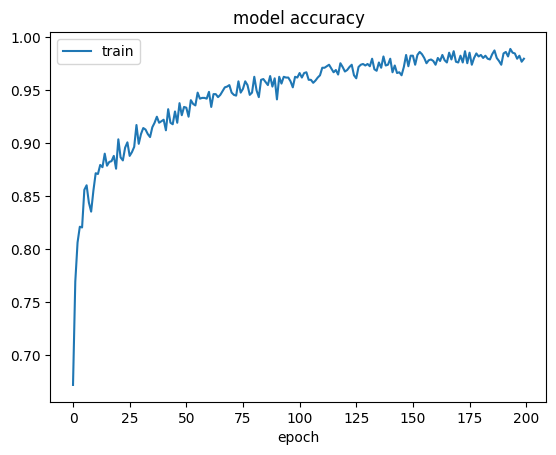

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
amcuracy=model.evaluate(train)
print(amcuracy)

44/44 [==============================] - 9s 170ms/step - loss: 0.0433 - accuracy: 0.9858
[0.04328654706478119, 0.9857954382896423]
